<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Etude de santé publique avec Python</h2>
<h3 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">DELCOURT Jade
</h3>
</div>

# 1.  Importation des librairies et chargement de fichiers

### Import des librairies

Utilité globale de chacunes des librairies.

    Pandas pour analyser et manipuler les données,
    Numpy pour manipuler des tableaux et des fonctions mathématiques tableaux,
    Matplotlib pour créer des graphiques à partir des données,
    Searborn semblable à une sur couche de Matplotlib qui apport certain designs.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Chargement des fichiers

Le chargement des fichiers CSV permets de les stockers dans des dataframes qui vont nous servires de bases de données. 

Pour le dateframe des besoins alimentaires, il a pour souce une extraction faite depuis le site de la FAO.

In [2]:
population = pd.read_csv('population.csv')
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
sous_nutrition = pd.read_csv('sous_nutrition.csv')
besoins_alimentaires = pd.read_csv('FAOSTAT_data_fr_1-26-2024.csv')

# 2.  Analyse et exploration des fichiers

### Vérification lier à l'import du fichier population

Afffichage des dimentions du dataset

In [3]:
print("Le tableau comporte {} ligne(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 ligne(s)
Le tableau comporte 3 colonne(s)


Affichage de la nature des données ainsi que le nombre de valeurs présentes dans chacune des colonnes 

In [4]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


Affichage des 5 premières lignes de la table

In [5]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


Harmonisation des unités en multipliant la population par 1 000

In [6]:
population["Valeur"] = population["Valeur"] * 1000

Renommer la colonne Valeur par Population

In [7]:
population.rename(columns = {"Valeur": "Population"}, inplace = True)

Affichage des 5 premières lignes de la table, pour voir les modifications

In [8]:
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


### Vérification lier à l'import du fichier disponibilité alimentaire

Afffichage des dimentions du dataset

In [9]:
print("Le tableau comporte {} ligne(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 ligne(s)
Le tableau comporte 18 colonne(s)


Affichage de la nature des données ainsi que le nombre de valeurs présentes dans chacune des colonnes 

In [10]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

Affichage les 5 premières lignes de la table

In [11]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


Remplacement des NaN dans le dataset par des 0

In [12]:
dispo_alimentaire = dispo_alimentaire.fillna(0)

Multiplication de toutes les lignes contenant des milliers de tonnes en Kg

Pour multiplier les valeurs des colonnes concernées en créant une liste avec le nom des colonnes. 

Ensuite je fait une boucle FOR pour que les colonnes présentes dans la liste soit reconues multiplé par 1 000 pour avoir des Kg.

In [13]:
colonnes_reconnues = ['Aliments pour animaux','Autres Utilisations', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture',
                      'Pertes', 'Production', 'Semences', 'Traitement']

for colonne in colonnes_reconnues: 
    dispo_alimentaire[colonne] = dispo_alimentaire[colonne] * 1000

Affichage les 5 premières lignes de la table

In [14]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


### Vérification lier à l'import du fichier aide alimentaire 

Afffichage des dimentions du dataset

In [15]:
print("Le tableau comporte {} ligne(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 ligne(s)
Le tableau comporte 4 colonne(s)


Affichage de la nature des données ainsi que le nombre de valeurs présentes dans chacune des colonnes 

In [16]:
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


Affichage les 5 premières lignes de la table

In [17]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


Renommer la colonne Pays bénéficiaire par Zone

In [18]:
aide_alimentaire.rename(columns = {"Pays bénéficiaire": "Zone"}, inplace = True)

Multiplication de la colonne aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg

In [19]:
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000

Affichage les 5 premières lignes de la table

In [20]:
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


### Vérification lier à l'import du fichier Sous nutrition 

Afffichage des dimentions du dataset

In [21]:
print("Le tableau comporte {} ligne(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 ligne(s)
Le tableau comporte 3 colonne(s)


Affichage de la nature des données ainsi que le nombre de valeurs présentes dans chacune des colonnes 

In [22]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


Afficher les 5 premières lignes de la table

In [23]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


Argument 'errors=coerce' va me permettre de convertir les valeurs qui ne sont pas des nombres en NaN. Ensuite je vais remplacer les NaN par des 0.

In [24]:
sous_nutrition["Valeur"] = pd.to_numeric(sous_nutrition["Valeur"], errors='coerce').fillna(0)

Renommer la colonne Valeur par sous_nutrition

In [25]:
sous_nutrition.rename(columns = {"Valeur": "sous_nutrition"}, inplace = True)

Harmonisation des unités en multiplication de la colonne sous_nutrition par 1 000 000

In [26]:
sous_nutrition["sous_nutrition"] = sous_nutrition["sous_nutrition"] * 1000000

Afficher les 5 premières lignes de la table

In [27]:
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


### Vérification lier à l'import du fichier Besoins alimentaires

Afffichage des dimentions du dataset

In [28]:
print("Le tableau comporte {} ligne(s)".format(besoins_alimentaires.shape[0]))
print("Le tableau comporte {} colonne(s)".format(besoins_alimentaires.shape[1]))

Le tableau comporte 388 ligne(s)
Le tableau comporte 6 colonne(s)


Affichage de la nature des données ainsi que le nombre de valeurs présentes dans chacune des colonnes 

In [29]:
besoins_alimentaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domaine  388 non-null    object
 1   Zone     388 non-null    object
 2   Élément  388 non-null    object
 3   Produit  388 non-null    object
 4   Année    388 non-null    int64 
 5   Valeur   388 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 18.3+ KB


Nettoyage et oraganisation des données importés

In [30]:
besoins_alimentaires = besoins_alimentaires.drop(columns = ['Domaine', 'Élément', 'Année']).reset_index()
besoins_alimentaires = besoins_alimentaires.pivot_table(index = 'Zone', columns = 'Produit', values = 'Valeur', aggfunc = 'sum').reset_index()

Afficher les 5 premières lignes de la table

In [31]:
besoins_alimentaires.head()

Produit,Zone,Besoins énergétiques alimentaires minimaux (kcal/personne/jour),Besoins énergétiques alimentaires moyens (kcal/personne/jour)
0,Afghanistan,1656,2105
1,Afrique du Sud,1827,2357
2,Albanie,1909,2488
3,Algérie,1785,2294
4,Allemagne,1949,2545


# 3.  Mes analyses 

### 1) Proportion de personnes en sous nutrition

Création des tables sous nutrition et population en ce focalisant sur l'année 2017

In [32]:
sous_nutrition_2017 = pd.DataFrame(sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018', :])
sous_nutrition_2017.loc[:, 'Année'] = '2017'
sous_nutrition_2017['Année'] = pd.to_numeric(sous_nutrition_2017['Année'])
sous_nutrition_2017.head()

,Zone,Année,sous_nutrition
4,Afghanistan,2017,10500000.0
10,Afrique du Sud,2017,3100000.0
16,Albanie,2017,100000.0
22,Algérie,2017,1300000.0
28,Allemagne,2017,0.0


In [33]:
population_2017 = pd.DataFrame(population.loc[population['Année'] == 2017, :])
population_2017.head()

,Zone,Année,Population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0


Jouinture des deux table ci-dessus pour que les données de sous nutrition et de la population soit regroupé dans un seul dataframe 

In [34]:
Proportion_pop_sous_nutrition_2017 = pd.merge(population_2017, sous_nutrition_2017, on = ['Zone', 'Année'], how = 'outer')

Calcule de la proportion en pourcentage de personnes en état de sous nutrition dans chaque pays

In [35]:
Proportion_pop_sous_nutrition_2017['% de personnes en sous nutrition'] = 100 * (round(Proportion_pop_sous_nutrition_2017['sous_nutrition'] / Proportion_pop_sous_nutrition_2017['Population'], 2))

Affichage du dataframe

In [36]:
Proportion_pop_sous_nutrition_2017

,Zone,Année,Population,sous_nutrition,% de personnes en sous nutrition
0,Afghanistan,2017,36296113.0,10500000.0,29.0
1,Afrique du Sud,2017,57009756.0,3100000.0,5.0
2,Albanie,2017,2884169.0,100000.0,3.0
3,Algérie,2017,41389189.0,1300000.0,3.0
4,Allemagne,2017,82658409.0,0.0,0.0
...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484.0,8000000.0,27.0
232,Viet Nam,2017,94600648.0,6500000.0,7.0
233,Yémen,2017,27834819.0,0.0,0.0
234,Zambie,2017,16853599.0,0.0,0.0


Pourcentage de personne en état de sous nutrition dans le monde 

In [37]:
print ("Le nombre de personnes en état de sous nutition dans le monde est de", round (100 * (Proportion_pop_sous_nutrition_2017['sous_nutrition'].sum()/Proportion_pop_sous_nutrition_2017['Population'].sum()), 2), "%")                                                                                     

Le nombre de personnes en état de sous nutition dans le monde est de 7.1 %


### 2) Nombre théorique de personne qui pourrait être nourries

Pour savoir le nombre théorique de personne qui pourrait être nourries je vais faire appelle au dataframe des besoins alimentaires.

In [38]:
besoins_alimentaires.head()

Produit,Zone,Besoins énergétiques alimentaires minimaux (kcal/personne/jour),Besoins énergétiques alimentaires moyens (kcal/personne/jour)
0,Afghanistan,1656,2105
1,Afrique du Sud,1827,2357
2,Albanie,1909,2488
3,Algérie,1785,2294
4,Allemagne,1949,2545


In [39]:
print("Un être humaine comnsomme en moyenne", round(besoins_alimentaires['Besoins énergétiques alimentaires moyens (kcal/personne/jour)'].mean(), 2), "calories par jours.") 

Un être humaine comnsomme en moyenne 2360.02 calories par jours.


In [40]:
print("Un être humaine peu consomer un minimum moyen de", round(besoins_alimentaires['Besoins énergétiques alimentaires minimaux (kcal/personne/jour)'].mean(), 2), "calories par jours.") 

Un être humaine peu consomer un minimum moyen de 1828.29 calories par jours.


Création du dataframe avec la disponibilité alimentaire par pays uniquement

In [41]:
dispo_alimentaire2 = dispo_alimentaire[['Zone', 'Produit','Disponibilité alimentaire (Kcal/personne/jour)']]
dispo_alimentaire2 = dispo_alimentaire2.groupby(['Zone']).sum(numeric_only = True)
dispo_alimentaire2 = dispo_alimentaire2.reset_index() 
dispo_alimentaire2

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


On commence par faire une jointure entre le data frame population 2017 et dispo_alimentaire par pays afin d'ajouter dans ce dernier la population. Ensuite, je joint la table des besoins alimentaires.

In [42]:
personne_nourrie = pd.merge(dispo_alimentaire2, population_2017, on = 'Zone', how = 'left')
personne_nourrie = pd.merge(personne_nourrie, besoins_alimentaires, on = 'Zone', how = 'left')

Affichage du nouveau dataframe

In [43]:
personne_nourrie

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population,Besoins énergétiques alimentaires minimaux (kcal/personne/jour),Besoins énergétiques alimentaires moyens (kcal/personne/jour)
0,Afghanistan,2087.0,2017.0,36296113.0,1656.0,2105.0
1,Afrique du Sud,3020.0,2017.0,57009756.0,1827.0,2357.0
2,Albanie,3188.0,2017.0,2884169.0,1909.0,2488.0
3,Algérie,3293.0,2017.0,41389189.0,1785.0,2294.0
4,Allemagne,3503.0,2017.0,82658409.0,1949.0,2545.0
...,...,...,...,...,...,...
235,Tokélaou,NaN,2017.0,1300.0,NaN,NaN
236,Tonga,NaN,2017.0,101998.0,1922.0,2487.0
237,Tuvalu,NaN,2017.0,11370.0,NaN,NaN
238,Chine,NaN,NaN,NaN,1875.0,2431.0


Création de la colonne dispo_kcal avec le calcul de la disponibilité alimentaire par pays en fonction de la population.

Création de la colonne humain nourrie min avec le calcul de dispo calorique en fonction des besoins énergétiques minimun par pays.

Création de la colonne humain nourrie avec le calcul de dispo calorique en fonction des besoins énergétiques moyen par  pays. 

In [44]:
personne_nourrie['dispo_kcal'] = (personne_nourrie['Population'] * personne_nourrie['Disponibilité alimentaire (Kcal/personne/jour)'])
personne_nourrie['Humain nourrie min'] = round(personne_nourrie['dispo_kcal'] / personne_nourrie['Besoins énergétiques alimentaires minimaux (kcal/personne/jour)'], 0)
personne_nourrie['Humain nourrie'] = round(personne_nourrie['dispo_kcal'] / personne_nourrie['Besoins énergétiques alimentaires moyens (kcal/personne/jour)'], 0)
personne_nourrie.loc['Total'] = personne_nourrie.sum(numeric_only = True)
pd.options.display.float_format = '{:.0f}'.format
personne_nourrie

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population,Besoins énergétiques alimentaires minimaux (kcal/personne/jour),Besoins énergétiques alimentaires moyens (kcal/personne/jour),dispo_kcal,Humain nourrie min,Humain nourrie
0,Afghanistan,2087,2017,36296113,1656,2105,75749987831,45742746,35985742
1,Afrique du Sud,3020,2017,57009756,1827,2357,172169463120,94236159,73046017
2,Albanie,3188,2017,2884169,1909,2488,9194730772,4816517,3695631
3,Algérie,3293,2017,41389189,1785,2294,136294599377,76355518,59413513
4,Allemagne,3503,2017,82658409,1949,2545,289552406727,148564601,113773048
...,...,...,...,...,...,...,...,...,...
236,Tonga,NaN,2017,101998,1922,2487,NaN,NaN,NaN
237,Tuvalu,NaN,2017,11370,NaN,NaN,NaN,NaN,NaN
238,Chine,NaN,NaN,NaN,1875,2431,NaN,NaN,NaN
239,Pays-Bas (Royaume des),NaN,NaN,NaN,1973,2579,NaN,NaN,NaN


Calcul du pourcentage de personnes pouvant être nourrie en fonction des besoins énergétiques moyens

In [45]:
print("Avec les besoins énergétiques alimentaires moyens,", round(100 * (personne_nourrie['Humain nourrie'].sum() / personne_nourrie['Population'].sum()), 2), "% de la population mondiale pourrait être nourrie")

Avec les besoins énergétiques alimentaires moyens, 116.93 % de la population mondiale pourrait être nourrie


Calcul du pourcentage de personnes pouvant être nourrie en fonction des besoins énergétiques minimum

In [46]:
print("Avec les besoins énergétiques alimentaires minimum,", round(100 * (personne_nourrie['Humain nourrie min'].sum() / personne_nourrie['Population'].sum()), 2), "% de la population mondiale pourrait être nourrie")

Avec les besoins énergétiques alimentaires minimum, 151.0 % de la population mondiale pourrait être nourrie


### 3) Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux

Création d'un dataframe avec uniquement les données inhérentes aux produits végétaux

In [47]:
dispo_vegetaux = dispo_alimentaire[['Zone', 'Origine', 'Disponibilité alimentaire (Kcal/personne/jour)']]
dispo_vegetaux = dispo_vegetaux[dispo_vegetaux['Origine'] == 'vegetale']
dispo_vegetaux = dispo_vegetaux.groupby(['Zone']).sum(numeric_only = True)
dispo_vegetaux = dispo_vegetaux.reset_index()
dispo_vegetaux

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,1871
1,Afrique du Sud,2533
2,Albanie,2203
3,Algérie,2915
4,Allemagne,2461
...,...,...
169,Émirats arabes unis,2718
170,Équateur,1732
171,États-Unis d'Amérique,2698
172,Éthiopie,2005


On commence par faire une jointure entre le data frame population 2017 et dispo_vegetaux par pays afin d'ajouter dans ce dernier la population. Ensuite, je joint la table des besoins alimentaires.

In [92]:
personne_nourrie_vegataux = pd.merge(dispo_vegetaux, population_2017, on = 'Zone', how = 'left')
personne_nourrie_vegataux = pd.merge(personne_nourrie_vegataux, besoins_alimentaires, on = 'Zone', how = 'left')
personne_nourrie_vegataux

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population,Besoins énergétiques alimentaires minimaux (kcal/personne/jour),Besoins énergétiques alimentaires moyens (kcal/personne/jour)
0,Afghanistan,1871,2017,36296113,1656,2105
1,Afrique du Sud,2533,2017,57009756,1827,2357
2,Albanie,2203,2017,2884169,1909,2488
3,Algérie,2915,2017,41389189,1785,2294
4,Allemagne,2461,2017,82658409,1949,2545
...,...,...,...,...,...,...
235,Tokélaou,NaN,2017,1300,NaN,NaN
236,Tonga,NaN,2017,101998,1922,2487
237,Tuvalu,NaN,2017,11370,NaN,NaN
238,Chine,NaN,NaN,NaN,1875,2431


Création de la colonne dispo_kcal avec le calcul de la disponibilité alimentaire par pays en fonction de la population.

Création de la colonne humain nourrie min avec le calcul de dispo caloorique en fonction des besoins énergétiques minimun par pays.

Création de la colonne humain nourrie avec le calcul de dispo caloorique en fonction des besoins énergétiques moyen par  pays. 

In [49]:
personne_nourrie_vegataux['dispo_kcal'] = (personne_nourrie_vegataux['Population'] * personne_nourrie_vegataux['Disponibilité alimentaire (Kcal/personne/jour)'])
personne_nourrie_vegataux['Humain nourrie min'] = round(personne_nourrie_vegataux['dispo_kcal'] / personne_nourrie_vegataux['Besoins énergétiques alimentaires minimaux (kcal/personne/jour)'], 0)
personne_nourrie_vegataux['Humain nourrie'] = round(personne_nourrie_vegataux['dispo_kcal'] /personne_nourrie_vegataux['Besoins énergétiques alimentaires moyens (kcal/personne/jour)'], 0)
personne_nourrie_vegataux.loc['Total'] = personne_nourrie_vegataux.sum(numeric_only = True)
personne_nourrie_vegataux

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population,Besoins énergétiques alimentaires minimaux (kcal/personne/jour),Besoins énergétiques alimentaires moyens (kcal/personne/jour),dispo_kcal,Humain nourrie min,Humain nourrie
0,Afghanistan,1871,2017,36296113,1656,2105,67910027423,41008471,32261296
1,Afrique du Sud,2533,2017,57009756,1827,2357,144405711948,79039799,61266742
2,Albanie,2203,2017,2884169,1909,2488,6353824307,3328352,2553788
3,Algérie,2915,2017,41389189,1785,2294,120649485935,67590748,52593499
4,Allemagne,2461,2017,82658409,1949,2545,203422344549,104372675,79930194
...,...,...,...,...,...,...,...,...,...
170,Équateur,1732,2017,16785361,1783,2297,29072245252,16305241,12656615
171,États-Unis d'Amérique,2698,2017,325084756,1957,2553,877078671688,448175101,343548246
172,Éthiopie,2005,2017,106399924,1730,2213,213331847620,123313207,96399389
173,Îles Salomon,2187,2017,636039,1699,2165,1391017293,818727,642502


Calcul du pourcentage de personnes pouvant être nourrie en fonction des besoins énergétiques moyen

In [50]:
print("Avec les besoins énergétiques alimentaires moyens,", round(100 * (personne_nourrie_vegataux['Humain nourrie'].sum() / personne_nourrie_vegataux['Population'].sum()), 2), "% de la population mondiale pourrait être nourrie")

Avec les besoins énergétiques alimentaires moyens, 100.29 % de la population mondiale pourrait être nourrie


Calcul du pourcentage de personnes pouvant être nourrie en fonction des besoins énergétiques minimum

In [51]:
print("Avec les besoins énergétiques alimentaires minimum,", round(100 * (personne_nourrie_vegataux['Humain nourrie min'].sum() / personne_nourrie_vegataux['Population'].sum()), 2), "% de la population mondiale pourrait être nourrie")

Avec les besoins énergétiques alimentaires minimum, 129.45 % de la population mondiale pourrait être nourrie


### 4) Utilisation de la disponibilité intérieure

Création d'un dataframe avec la disponibilité intérieure et comment celle-ci ce répartie.

In [52]:
dispo_intérieure = dispo_alimentaire[['Zone', 'Disponibilité intérieure', 'Aliments pour animaux', 'Nourriture', 'Pertes', 'Semences', 'Traitement', 'Autres Utilisations']]
dispo_intérieure = dispo_intérieure.groupby(['Zone']).sum(numeric_only = True)
dispo_intérieure.loc['Total'] = dispo_intérieure.sum(numeric_only = True) 
dispo_intérieure

,Disponibilité intérieure,Aliments pour animaux,Nourriture,Pertes,Semences,Traitement,Autres Utilisations
Zone,,,,,,,
Afghanistan,13515000,768000,10735000,1135000,395000,63000,415000
Afrique du Sud,61256000,5309000,29812000,2193000,253000,22819000,876000
Albanie,4758000,660000,3476000,276000,55000,113000,174000
Algérie,42630000,4352000,31729000,3753000,449000,637000,1707000
Allemagne,162275000,30209000,79238000,3781000,1551000,39842000,7711000
...,...,...,...,...,...,...,...
Équateur,18614000,1200000,8574000,707000,138000,6200000,1909000
États-Unis d'Amérique,777992000,148432000,320889000,7162000,10403000,141010000,154699000
Éthiopie,44014000,685000,33361000,2256000,640000,3443000,3641000


Mise en poucentage des valeurs ou se répartie la disponibilité intérieure, puis renommage des colonnes modifié

In [53]:
dispo_intérieure['Aliments pour animaux'] = (dispo_intérieure['Aliments pour animaux'] / dispo_intérieure['Disponibilité intérieure']) * 100
dispo_intérieure['Nourriture'] = (dispo_intérieure['Nourriture'] / dispo_intérieure['Disponibilité intérieure']) * 100
dispo_intérieure['Pertes'] = (dispo_intérieure['Pertes'] / dispo_intérieure['Disponibilité intérieure']) * 100
dispo_intérieure['Semences'] = (dispo_intérieure['Semences'] / dispo_intérieure['Disponibilité intérieure']) * 100
dispo_intérieure['Traitement'] = (dispo_intérieure['Traitement'] / dispo_intérieure['Disponibilité intérieure']) * 100
dispo_intérieure['Autres Utilisations'] = (dispo_intérieure['Autres Utilisations'] / dispo_intérieure['Disponibilité intérieure']) * 100

dispo_intérieure.rename(columns = {'Aliments pour animaux': 'Aliments pour animaux en %'}, inplace = True)
dispo_intérieure.rename(columns = {'Nourriture': 'Nourriture en %'}, inplace = True)
dispo_intérieure.rename(columns = {'Pertes': 'Pertes en %'}, inplace = True)
dispo_intérieure.rename(columns = {'Semences': 'Semences en %'}, inplace = True)
dispo_intérieure.rename(columns = {'Traitement': 'Traitement en %'}, inplace = True)
dispo_intérieure.rename(columns = {'Autres Utilisations': 'Autres Utilisations en %'}, inplace = True)

dispo_intérieure

,Disponibilité intérieure,Aliments pour animaux en %,Nourriture en %,Pertes en %,Semences en %,Traitement en %,Autres Utilisations en %
Zone,,,,,,,
Afghanistan,13515000,6,79,8,3,0,3
Afrique du Sud,61256000,9,49,4,0,37,1
Albanie,4758000,14,73,6,1,2,4
Algérie,42630000,10,74,9,1,1,4
Allemagne,162275000,19,49,2,1,25,5
...,...,...,...,...,...,...,...
Équateur,18614000,6,46,4,1,33,10
États-Unis d'Amérique,777992000,19,41,1,1,18,20
Éthiopie,44014000,2,76,5,1,8,8


Création d'un diagramme circulaires représentant la répartition de la disponibilité interieur totale. 

Les 3 premières lignes correspondents au design du graphique.

Ensuite, je séléctionne la ligne total de mon dataframe car c'est elle qui m'intéresse et je définie les étiquettes de mon graphique.

Enfin je trace mon graphique avec les paramètres définies précédements et j'ajoute mon titre.

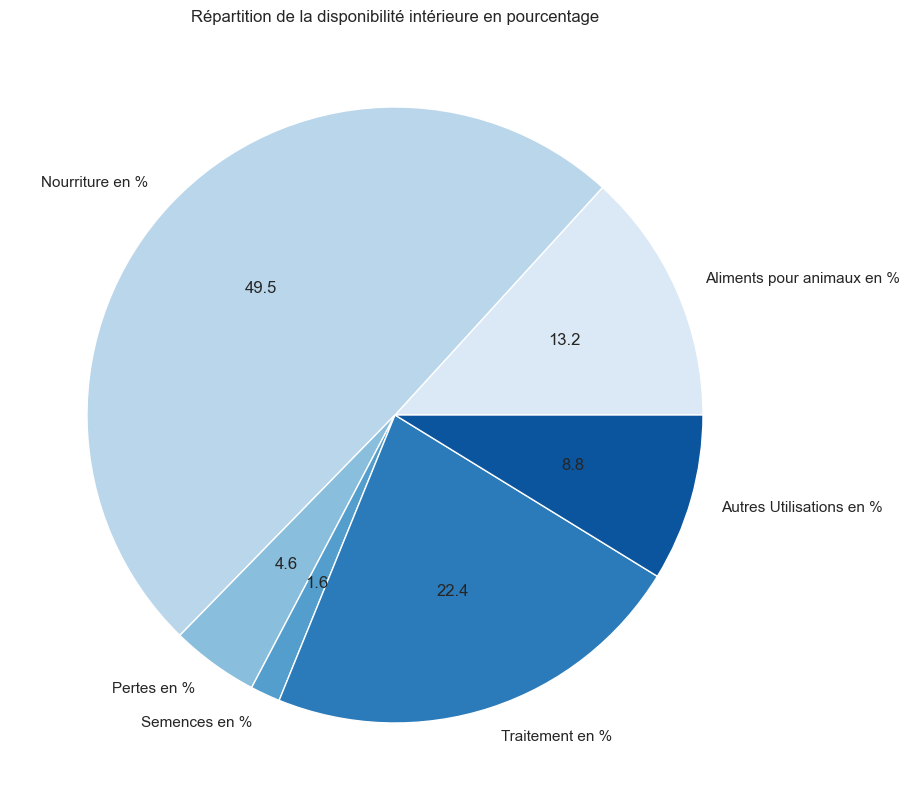

In [54]:
plt.figure(figsize=(10, 10))
sns.set_theme()
palette = sns.color_palette("Blues", 6)

total_values = dispo_intérieure.loc['Total', ['Aliments pour animaux en %', 'Nourriture en %', 'Pertes en %', 'Semences en %', 'Traitement en %', 'Autres Utilisations en %']]
labels = ['Aliments pour animaux en %', 'Nourriture en %', 'Pertes en %', 'Semences en %', 'Traitement en %', 'Autres Utilisations en %']

plt.pie(total_values, labels=labels, autopct='%1.1f', colors = palette)
plt.title('Répartition de la disponibilité intérieure en pourcentage')

plt.show()


Création d'une boucle FOR pour afficher les valeurs en fonction des colonnes : aliments pour animaux, pertes et nourriture.

Premièrement je vais crée une liste avec les colonnes ciblées, puis je filtre sur la dernière ligne de mon data frame dispo_intérieure pour avoir le total.

Enfin, je crée ma boucle FOR pour que le nom de mes colonnes soit recherché, que le nom soit affiché, que la valeur de ma ligne totale soit affiché. En dernier, j'ai ajouté un saut de ligne entre mes résultats pour plus de lisibilité.

In [55]:
colonnes_cible = ['Aliments pour animaux en %', "Pertes en %", "Nourriture en %"]
derniere_ligne = dispo_intérieure.iloc[-1]

for colonne in colonnes_cible:
    print(f"Colonnes : {colonne}")
    print(round(derniere_ligne[colonne], 2))
    
    print("\n")


Colonnes : Aliments pour animaux en %
13.24


Colonnes : Pertes en %
4.61


Colonnes : Nourriture en %
49.51




### 5) Utilisation des céréales

Création d'une liste avec les variables nécessaire à la mis en place d'un dataframe ciblant la dispo alimentaire des céréales.

In [56]:
cereales = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Quinoa']
cereales

['Blé',
 'Riz (Eq Blanchi)',
 'Orge',
 'Maïs',
 'Seigle',
 'Avoine',
 'Millet',
 'Sorgho',
 'Quinoa']

Création du dataframe de la disponibilité alimentaire liée aux céréales, en excluant de la colonnes produits les lignes ou les produits ne sont pas dans ma liste de céréales

In [57]:
dispo_cereales = dispo_alimentaire[dispo_alimentaire['Produit'].isin(cereales)]
dispo_cereales

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0,0,1369,160,5,37,5992000,0,1173000,4895000,775000,5169000,322000,0,-350
32,Afghanistan,Maïs,vegetale,200000,0,21,2,0,1,313000,0,1000,76000,31000,312000,5000,0,0
34,Afghanistan,Millet,vegetale,0,0,3,0,0,0,13000,0,0,12000,1000,13000,0,0,0
40,Afghanistan,Orge,vegetale,360000,0,26,3,0,1,524000,0,10000,89000,52000,514000,22000,0,0
47,Afghanistan,Riz (Eq Blanchi),vegetale,0,0,141,14,0,3,461000,0,119000,422000,24000,342000,14000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15537,Îles Salomon,Blé,vegetale,0,0,184,25,1,5,14000,0,14000,14000,0,0,0,0,0
15568,Îles Salomon,Maïs,vegetale,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
15575,Îles Salomon,Orge,vegetale,0,0,0,0,0,0,1000,0,1000,0,0,0,0,1000,0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0,12000,623,64,1,11,49000,0,47000,36000,1000,3000,0,0,0


Affichage de la proportion d'alimentation animale

In [58]:
proportion_animale = 100 * (dispo_cereales['Aliments pour animaux'].sum() / dispo_cereales['Disponibilité intérieure'].sum())
print("La porportion d'alimentation animale est de ", round(proportion_animale , 2), " % sur l'alimentation globale")

La porportion d'alimentation animale est de  35.91  % sur l'alimentation globale


Affichage de la proportion de nourriture

In [59]:
proportion_hum = 100 * (dispo_cereales['Nourriture'].sum() / dispo_cereales['Disponibilité intérieure'].sum())
print("La porportion d'alimantation humaine est de ", round(proportion_hum , 2), " % sur l'alimentation globale")

La porportion d'alimantation humaine est de  43.02  % sur l'alimentation globale


Filtrage par pays pour avoir la disponibilité intérieure des céréales par pays

In [60]:
dispo_cereales = dispo_cereales.groupby(['Zone']).sum(numeric_only = True)
dispo_cereales.loc['Total'] = dispo_cereales.sum(numeric_only = True) 
dispo_cereales

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,560000,0,1560,180,6,41,7303000,0,1303000,5494000,883000,6350000,363000,0,-350
Afrique du Sud,4816000,0,1537,180,10,41,15481000,3767000,3144000,9499000,500000,14136000,73000,593000,1969
Albanie,411000,134000,1144,149,6,35,1145000,4000,468000,474000,91000,703000,22000,12000,-22
Algérie,4335000,820000,1678,218,7,49,15009000,2000,10275000,8534000,1024000,4914000,253000,42000,-180
Allemagne,24242000,785000,867,110,3,26,39380000,16450000,10795000,9135000,1168000,45067000,959000,3090000,-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Équateur,846000,787000,812,96,3,19,3405000,52000,875000,1504000,138000,2597000,39000,93000,-15
États-Unis d'Amérique,140019000,137181000,796,105,4,24,342735000,66211000,13196000,33610000,222000,433605000,3095000,28608000,-37854
Éthiopie,667000,3100000,1108,124,5,30,17004000,24000,1053000,11663000,934000,17974000,309000,333000,-1997


Mise en poucentage des valeurs ou se répartie la disponibilité intérieure des céréales, puis renommage des colonnes modifié

In [61]:
dispo_cereales['Aliments pour animaux'] = (dispo_cereales['Aliments pour animaux'] / dispo_cereales['Disponibilité intérieure']) * 100
dispo_cereales['Nourriture'] = (dispo_cereales['Nourriture'] / dispo_cereales['Disponibilité intérieure']) * 100
dispo_cereales['Pertes'] = (dispo_cereales['Pertes'] / dispo_cereales['Disponibilité intérieure']) * 100
dispo_cereales['Semences'] = (dispo_cereales['Semences'] / dispo_cereales['Disponibilité intérieure']) * 100
dispo_cereales['Traitement'] = (dispo_cereales['Traitement'] / dispo_cereales['Disponibilité intérieure']) * 100
dispo_cereales['Autres Utilisations'] = (dispo_cereales['Autres Utilisations'] / dispo_cereales['Disponibilité intérieure']) * 100

dispo_cereales.rename(columns = {'Aliments pour animaux': 'Aliments pour animaux en %'}, inplace = True)
dispo_cereales.rename(columns = {'Nourriture': 'Nourriture en %'}, inplace = True)
dispo_cereales.rename(columns = {'Pertes': 'Pertes en %'}, inplace = True)
dispo_cereales.rename(columns = {'Semences': 'Semences en %'}, inplace = True)
dispo_cereales.rename(columns = {'Traitement': 'Traitement en %'}, inplace = True)
dispo_cereales.rename(columns = {'Autres Utilisations': 'Autres Utilisations en %'}, inplace = True)

dispo_cereales

,Aliments pour animaux en %,Autres Utilisations en %,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture en %,Pertes en %,Production,Semences en %,Traitement en %,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,8,0,1560,180,6,41,7303000,0,1303000,75,12,6350000,5,0,-350
Afrique du Sud,31,0,1537,180,10,41,15481000,3767000,3144000,61,3,14136000,0,4,1969
Albanie,36,12,1144,149,6,35,1145000,4000,468000,41,8,703000,2,1,-22
Algérie,29,5,1678,218,7,49,15009000,2000,10275000,57,7,4914000,2,0,-180
Allemagne,62,2,867,110,3,26,39380000,16450000,10795000,23,3,45067000,2,8,-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Équateur,25,23,812,96,3,19,3405000,52000,875000,44,4,2597000,1,3,-15
États-Unis d'Amérique,41,40,796,105,4,24,342735000,66211000,13196000,10,0,433605000,1,8,-37854
Éthiopie,4,18,1108,124,5,30,17004000,24000,1053000,69,5,17974000,2,2,-1997


Création d'un diagramme circulaires représentant la répartition de la disponibilité intérieure totale des céréales. 

Les 3 premières lignes correspondents au design du graphique.

Ensuite, je séléctionne la ligne total de mon dataframe car c'est elle qui m'intéresse et je définie les étiquettes de mon graphique.

Enfin je trace mon graphique avec les paramètres définies précédements et j'ajoute mon titre.

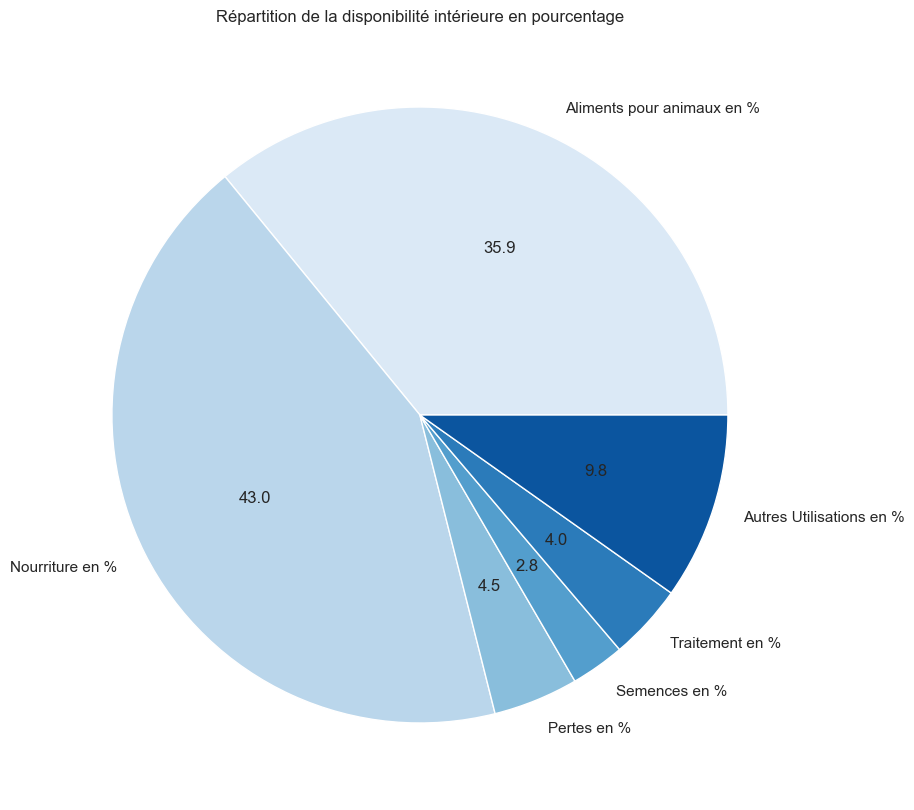

In [62]:
plt.figure(figsize=(10, 10))
sns.set_theme()
palette = sns.color_palette("Blues", 6)

total_values = dispo_cereales.loc['Total', ['Aliments pour animaux en %', 'Nourriture en %', 'Pertes en %', 'Semences en %', 'Traitement en %', 'Autres Utilisations en %']]
labels = ['Aliments pour animaux en %', 'Nourriture en %', 'Pertes en %', 'Semences en %', 'Traitement en %', 'Autres Utilisations en %']

plt.pie(total_values, labels=labels, autopct='%1.1f', colors = palette)
plt.title('Répartition de la disponibilité intérieure en pourcentage')

plt.show()

### 6) Pays avec la proportion de personnes sous-alimentée la plus forte en 2017

Dans le dataframe Proportion_pop_sous_nutrition_2017 nous avions calculé la proportion, en %, de personne en état de sous-nutrition. Je rappel ce dataframe.

In [63]:
Proportion_pop_sous_nutrition_2017['% de personnes en sous nutrition'] = round(Proportion_pop_sous_nutrition_2017['% de personnes en sous nutrition'], 2)
Proportion_pop_sous_nutrition_2017.head()

,Zone,Année,Population,sous_nutrition,% de personnes en sous nutrition
0,Afghanistan,2017,36296113,10500000,29
1,Afrique du Sud,2017,57009756,3100000,5
2,Albanie,2017,2884169,100000,3
3,Algérie,2017,41389189,1300000,3
4,Allemagne,2017,82658409,0,0


J'affiche maintenat les pays avec le plus de personnes en sous-nutrition

In [64]:
Proportion_pop_sous_nutrition_2017 = Proportion_pop_sous_nutrition_2017.sort_values(['% de personnes en sous nutrition'], ascending = False)
Proportion_pop_sous_nutrition_2017.head(10)

,Zone,Année,Population,sous_nutrition,% de personnes en sous nutrition
87,Haïti,2017,10982366,5300000,48
181,République populaire démocratique de Corée,2017,25429825,12000000,47
128,Madagascar,2017,25570512,10500000,41
122,Libéria,2017,4702226,1800000,38
216,Tchad,2017,15016753,5700000,38
119,Lesotho,2017,2091534,800000,38
186,Rwanda,2017,11980961,4200000,35
145,Mozambique,2017,28649018,9400000,33
219,Timor-Leste,2017,1243258,400000,32
0,Afghanistan,2017,36296113,10500000,29


Création d'un histogramme représentant les pays avec les plus de personnes en sous nutrition en 2017. 

Les 3 premières lignes correspondents au design du graphique.

Ensuite, je trace mon graphique en définissant les paramètres à partir des informations de mon dataframe et j'ajoute mes titres d'axes et du graphqiue.

Enfin j'affiche une grille en fonds et positionne les pays en biais pour une meilleur lisibilité.

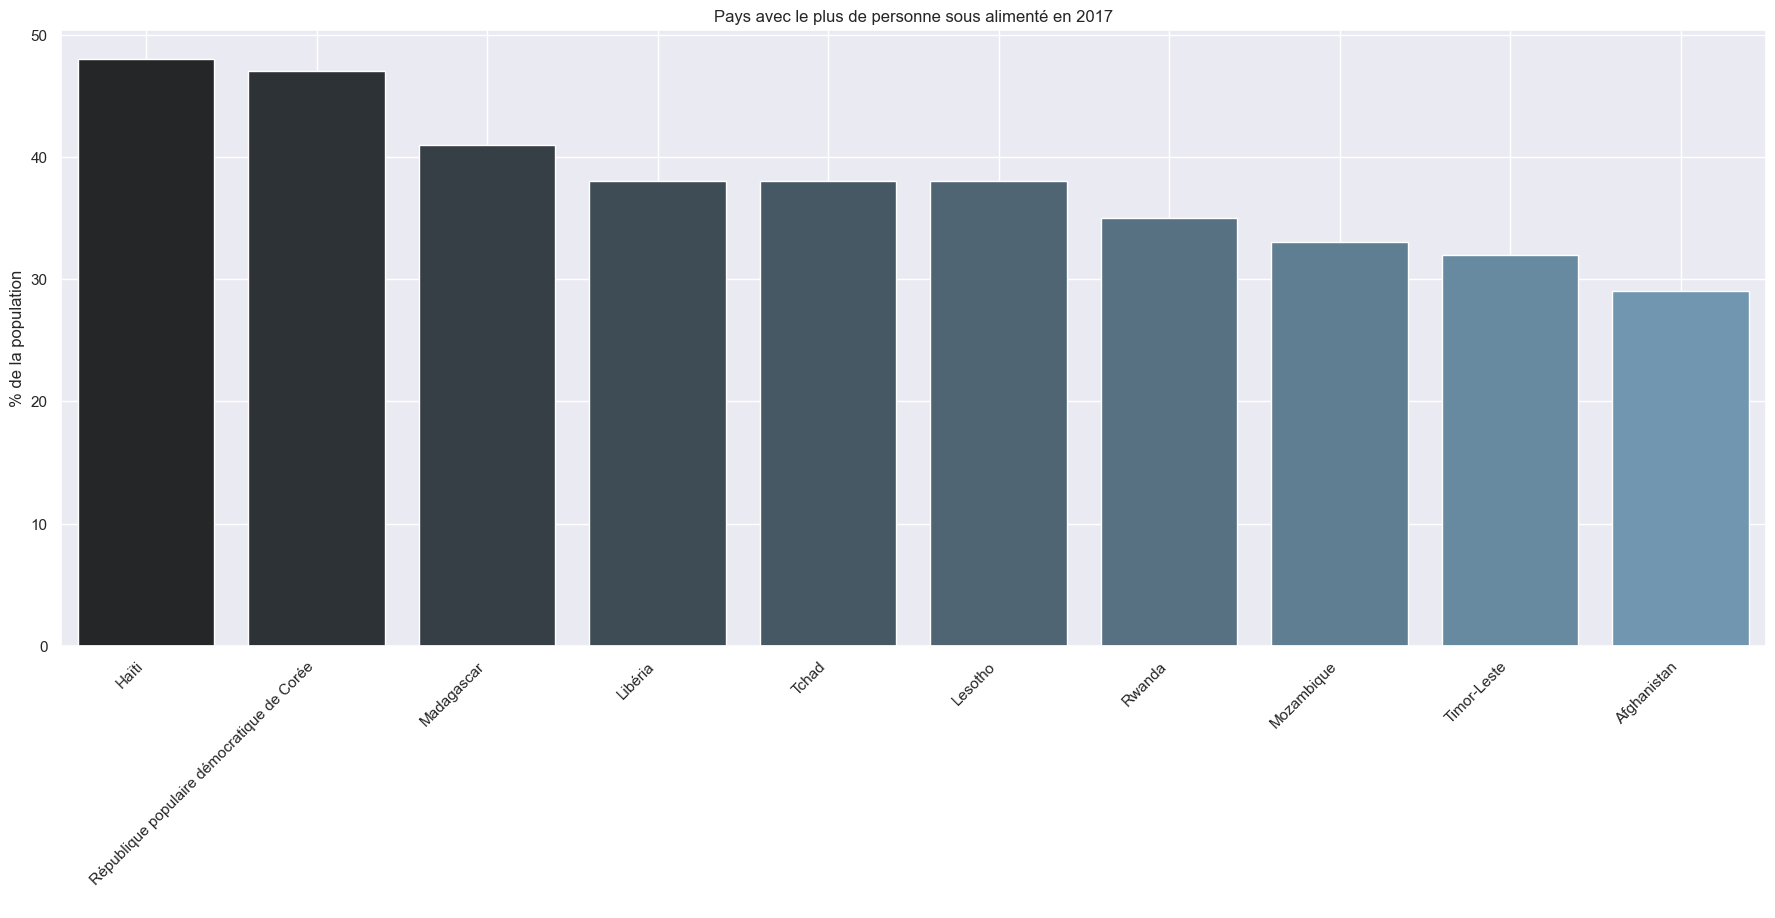

In [65]:
plt.figure(figsize=(22, 8))
sns.set_theme()
palette = sns.dark_palette("#69b", 10)

sns.barplot(data=Proportion_pop_sous_nutrition_2017.head(10), x='Zone', y='% de personnes en sous nutrition', errorbar=None, estimator=sum, palette = palette)

plt.xlabel(" ")
plt.ylabel("% de la population")
plt.title("Pays avec le plus de personne sous alimenté en 2017")

plt.gca().set_axisbelow(True)
plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.show()

### 7) Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013

Création du dataframe qui resence l'aide alimentaire depuis 2013 par pays.

In [66]:
aide_alimentaire_sin2013 = aide_alimentaire[['Zone', 'Valeur']]
aide_alimentaire_sin2013 = aide_alimentaire_sin2013.groupby(['Zone']).sum(numeric_only = True)
aide_alimentaire_sin2013 = aide_alimentaire_sin2013.sort_values(['Valeur'], ascending = False)
aide_alimentaire_sin2013.rename(columns = {'Valeur' : 'Aide alimentaire par pays'}, inplace = True)
aide_alimentaire_sin2013.head()

,Aide alimentaire par pays
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000


Affichage des 10 pays aillant le plus bénéfiché de l'aide alimentaire depuis 2013

In [67]:
aide_alimentaire_sin2013 = aide_alimentaire_sin2013.sort_values(['Aide alimentaire par pays'], ascending = False).reset_index()
aide_alimentaire_sin2013_top10 = aide_alimentaire_sin2013.head(10)
aide_alimentaire_sin2013_top10 

,Zone,Aide alimentaire par pays
0,République arabe syrienne,1858943000
1,Éthiopie,1381294000
2,Yémen,1206484000
3,Soudan du Sud,695248000
4,Soudan,669784000
5,Kenya,552836000
6,Bangladesh,348188000
7,Somalie,292678000
8,République démocratique du Congo,288502000
9,Niger,276344000


Création d'un histogramme représentant les 10 pays aillant les plus bénéficier d'aide alimentaire depuis 2013. 

Les 3 premières lignes correspondents au design du graphique.

Ensuite, je trace mon graphique en définissant les paramètres à partir des informations de mon dataframe et j'ajoute mes titres d'axes et du graphqiue.

Enfin j'affiche une grille en fonds et positionne les pays en biais pour une meilleur lisibilité.

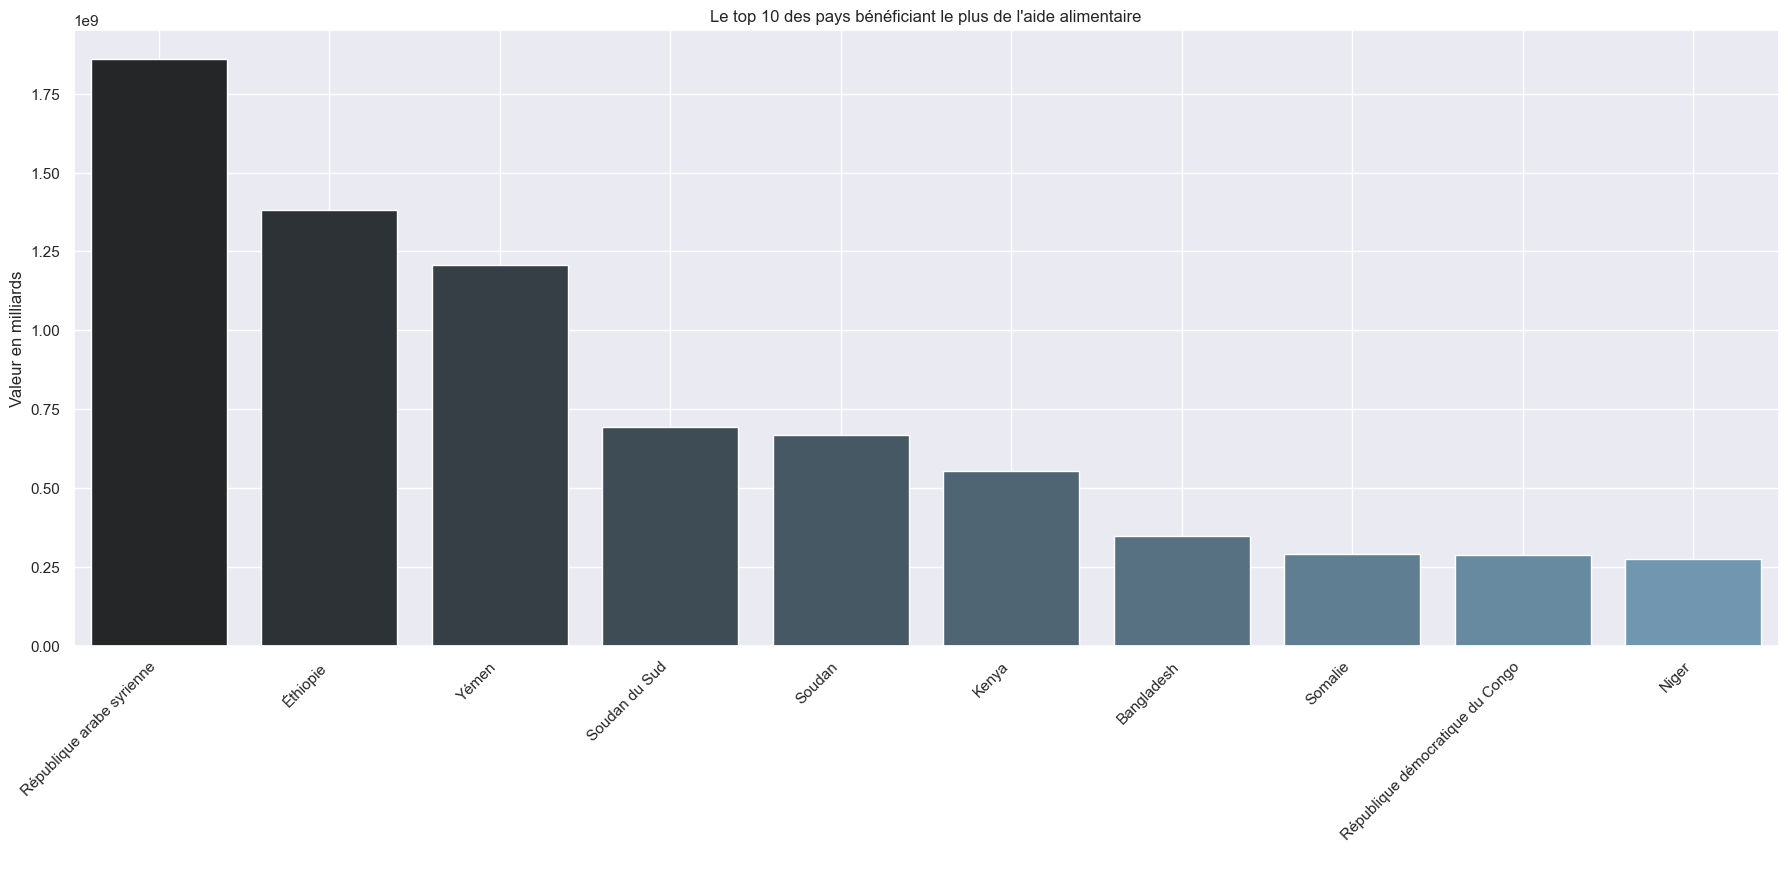

In [68]:
plt.figure(figsize=(22, 8))
sns.set_theme()
palette = sns.dark_palette("#69b", 10)

sns.barplot(data=aide_alimentaire_sin2013_top10, x='Zone', y='Aide alimentaire par pays', errorbar=None, estimator=sum, palette = palette)

plt.xlabel(" ")
plt.ylabel("Valeur en milliards")
plt.title("Le top 10 des pays bénéficiant le plus de l'aide alimentaire")

plt.gca().set_axisbelow(True)
plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.show()

### 8) Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016

In [69]:
evolution_aide_alimentaire = aide_alimentaire[['Zone', 'Année', 'Valeur']]
evolution_aide_alimentaire = evolution_aide_alimentaire.loc[(evolution_aide_alimentaire['Année']  == 2013) | (evolution_aide_alimentaire['Année']  == 2014) | (evolution_aide_alimentaire['Année']  == 2015) | (evolution_aide_alimentaire['Année']  == 2016) ]
evolution_aide_alimentaire = evolution_aide_alimentaire.groupby(['Zone', 'Année']).sum(numeric_only = True).reset_index()
evolution_aide_alimentaire

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


Création d'une liste avec les 5 pays les plus bénéficiaire de l'aide alimentaire, extraite de du data frame vu en amont

In [70]:
top_5_benef = [ 'République arabe syrienne' , 'Éthiopie' , 'Yémen', 'Soudan du Sud', 'Soudan']
top_5_benef

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

Création d'un dataframe avec uniquement les valeurs des pays présents dans la liste, avec un trie des valeurs par ordre décroisant sur l'aide alimentaire

In [71]:
evo_aide_alimentaire_5 = evolution_aide_alimentaire[evolution_aide_alimentaire['Zone'].isin(top_5_benef)]
evo_aide_alimentaire_5 = evo_aide_alimentaire_5.sort_values('Valeur', ascending = False)
evo_aide_alimentaire_5['Année'] = evo_aide_alimentaire_5['Année'].astype(str)
evo_aide_alimentaire_5

,Zone,Année,Valeur
158,République arabe syrienne,2014,651870000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000
157,République arabe syrienne,2013,563566000
159,République arabe syrienne,2015,524949000
217,Yémen,2016,465574000
193,Soudan du Sud,2014,450610000
216,Yémen,2015,372306000
189,Soudan,2013,330230000
190,Soudan,2014,321904000


Création d'un tableau avec une colonne par pays avec les différentes valeurs par années sur les lignes

In [72]:
table_evo_aide_alimentaire_5 = evo_aide_alimentaire_5.pivot_table(index = 'Année', columns = 'Zone', values = 'Valeur', aggfunc = 'sum')
table_evo_aide_alimentaire_5 = table_evo_aide_alimentaire_5.reset_index()
table_evo_aide_alimentaire_5

Zone,Année,République arabe syrienne,Soudan,Soudan du Sud,Yémen,Éthiopie
0,2013,563566000,330230000,196330000,264764000,591404000
1,2014,651870000,321904000,450610000,103840000,586624000
2,2015,524949000,17650000,48308000,372306000,203266000
3,2016,118558000,NaN,NaN,465574000,NaN


Création d'un histogramme représentant les 5 pays aillant les plus bénéficier d'aide alimentaire depuis 2013. 

Les 3 premières lignes correspondents au design du graphique.

Ensuite, je trace mon graphique en définissant les paramètres à partir des informations de mon data frame et j'ajoute mes titres d'axes et du graphqiue.

Enfin j'affiche une grille en fonds pour une meilleur lisibilité.

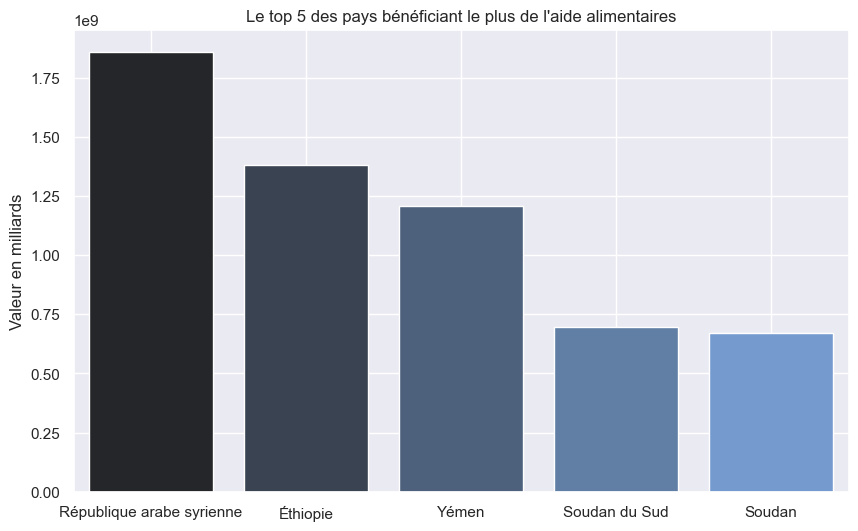

In [73]:
plt.figure(figsize=(10, 6))
sns.set_theme()
palette = sns.dark_palette("#69d", 5)

sns.barplot(data=evo_aide_alimentaire_5, x='Zone', y='Valeur', errorbar=None, estimator=sum, palette = palette)

plt.xlabel("")
plt.ylabel("Valeur en milliards")
plt.title("Le top 5 des pays bénéficiant le plus de l'aide alimentaires")

plt.gca().set_axisbelow(True)
plt.grid(True)
plt.show()

Création d'un graphique linéaire représentant l'aide alimentaire distribué aux 5 pays aillant les plus bénéficier d'aide alimentaire depuis 2013. 

Les 2 premières lignes correspondents au design du graphique.

Ensuite, je trace mon graphique en définissant les paramètres à partir des informations de mon data frame et j'ajoute mes titres d'axes et du graphqiue ainsi que la légende de mes courbes.

Enfin j'affiche une grille en fonds pour une meilleur lisibilité.

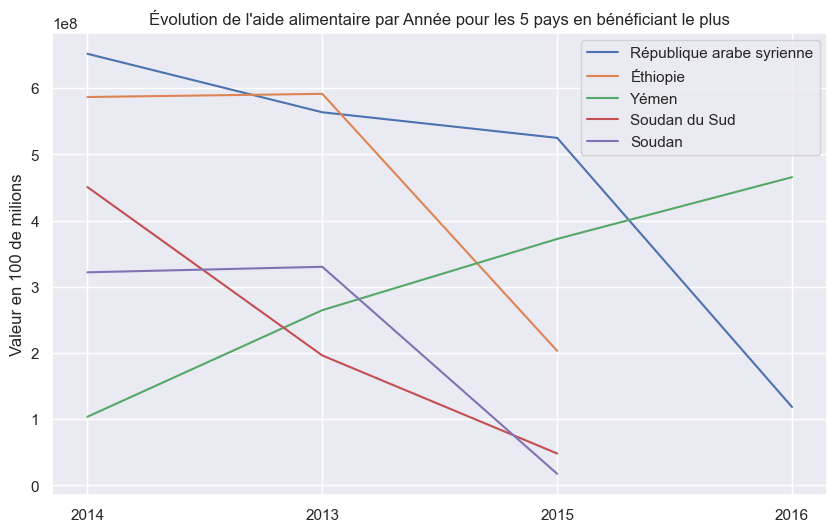

In [74]:
plt.figure(figsize=(10, 6))
sns.set_theme()

sns.lineplot(data=evo_aide_alimentaire_5, x='Année', y='Valeur', hue='Zone')
    
plt.xlabel('')
plt.ylabel('Valeur en 100 de milions')
plt.title("Évolution de l'aide alimentaire par Année pour les 5 pays en bénéficiant le plus")
plt.legend()


plt.grid(True)
plt.show()

### 9) Pays avec le moins de disponibilité par habitant

Affichage de la disponibilité en calories par personne par jour par pays

In [75]:
dispo_alimentaire_pays = dispo_alimentaire[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]
dispo_alimentaire_pays = dispo_alimentaire_pays.groupby('Zone').sum(numeric_only = True).reset_index()
dispo_alimentaire_pays

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087
1,Afrique du Sud,3020
2,Albanie,3188
3,Algérie,3293
4,Allemagne,3503
...,...,...
169,Émirats arabes unis,3275
170,Équateur,2346
171,États-Unis d'Amérique,3682
172,Éthiopie,2129


Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 

In [76]:
dispo_alimentaire_min = dispo_alimentaire_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = True)
dispo_alimentaire_min = dispo_alimentaire_min.head(10)
dispo_alimentaire_min

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879
166,Zambie,1924
91,Madagascar,2056
0,Afghanistan,2087
65,Haïti,2089
133,République populaire démocratique de Corée,2093
151,Tchad,2109
167,Zimbabwe,2113
114,Ouganda,2126
154,Timor-Leste,2129


Création d'un histogramme représentant les 10 pays avec les plus faibles disponibilités alimentaire. 

Les 2 premières lignes correspondents au design du graphique.

Ensuite, je trace mon graphique en définissant les paramètres à partir des informations de mon dataframe et j'ajoute mes titres d'axes et du graphqiue ainsi que la légende de mes courbes.

Enfin j'affiche une grille en fonds et positionne les pays en biais pour une meilleur lisibilité.

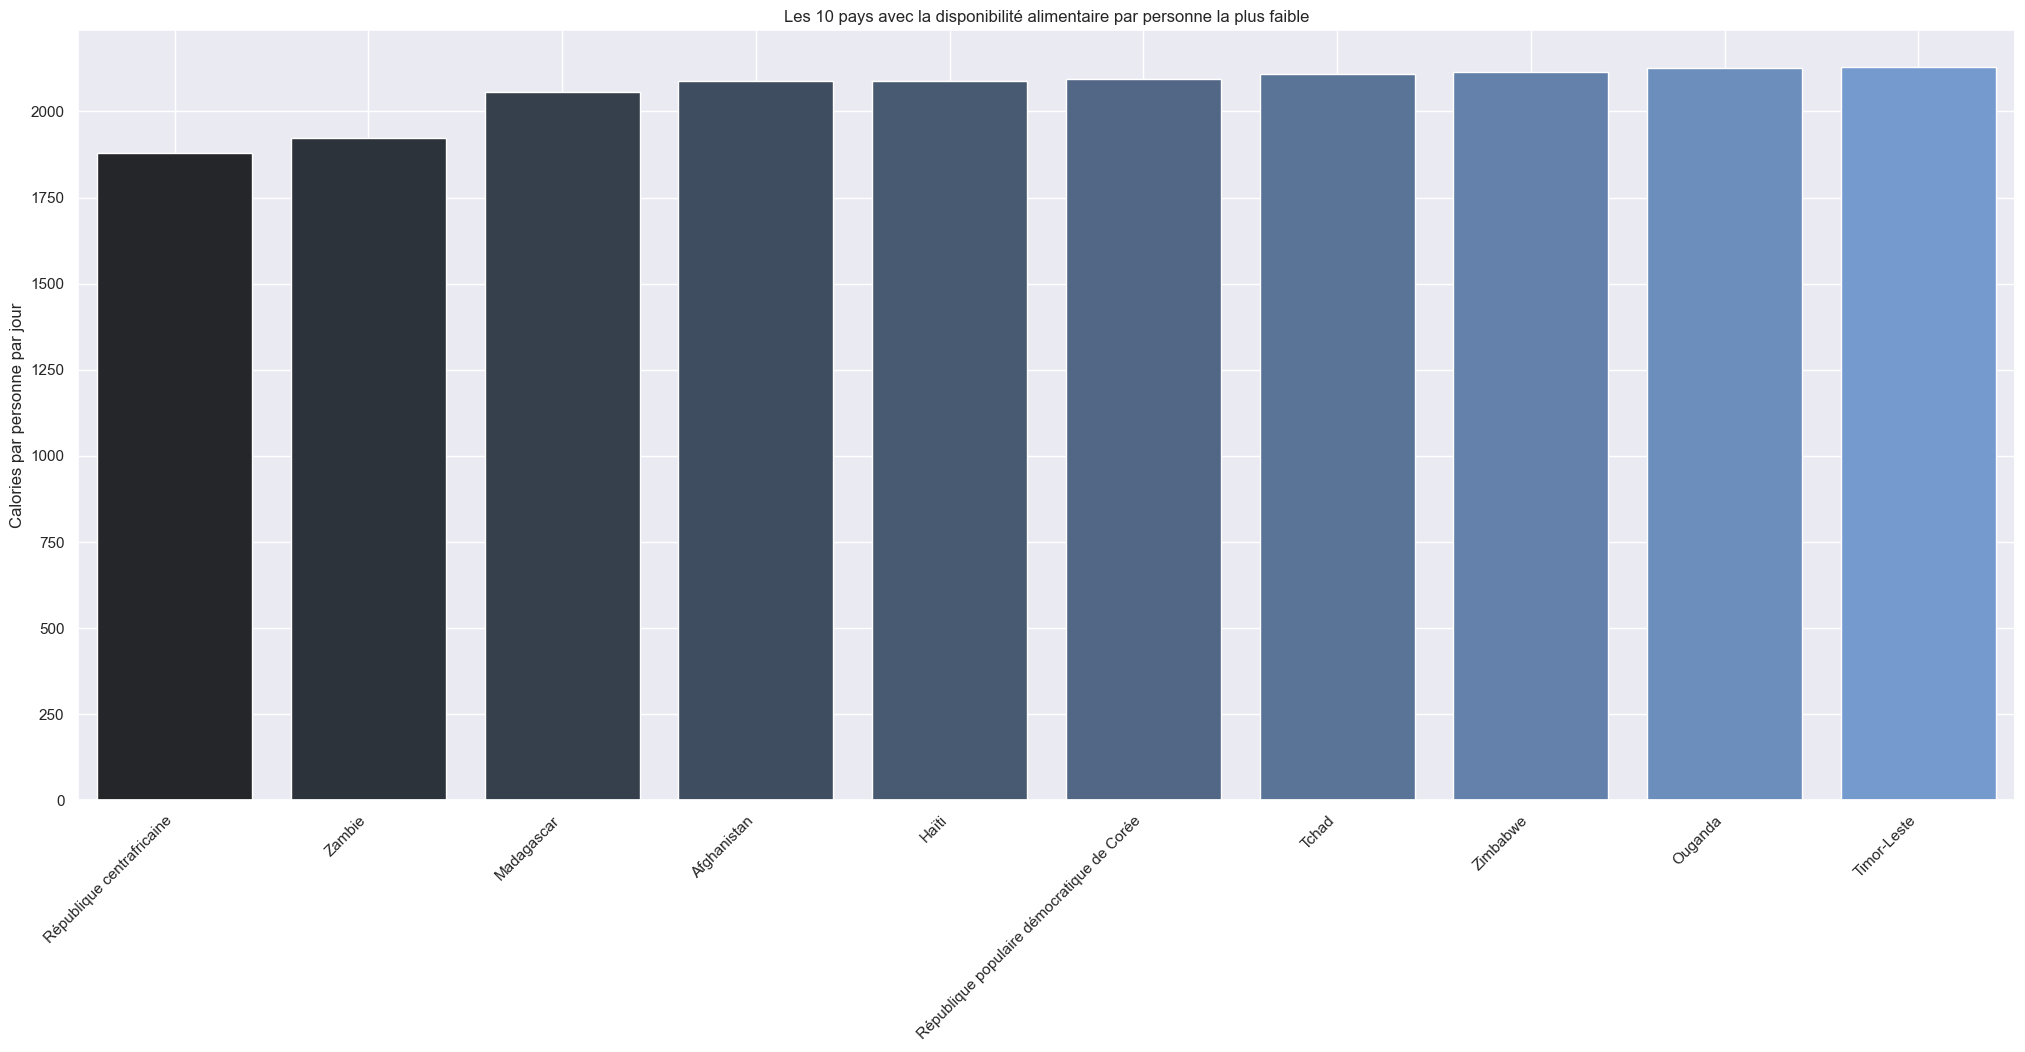

In [77]:
plt.figure(figsize=(25, 10))
palette = sns.dark_palette("#69d",  10)

sns.barplot(data=dispo_alimentaire_min, x='Zone', y='Disponibilité alimentaire (Kcal/personne/jour)', palette = palette)

plt.xlabel("")
plt.ylabel("Calories par personne par jour")
plt.title("Les 10 pays avec la disponibilité alimentaire par personne la plus faible")

plt.gca().set_axisbelow(True)
plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.show()

### 10) Pays avec le plus de disponibilité par habitant

Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 

In [78]:
dispo_alimentaire_max = dispo_alimentaire_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = False)
dispo_alimentaire_max = dispo_alimentaire_max.head(10)

Création d'un histogramme représentant les 10 pays avec les disponibilités alimentaire les plus élévés. 

Les 2 premières lignes correspondents au design du graphique.

Ensuite, je trace mon graphique en définissant les paramètres à partir des informations de mon dataframe et j'ajoute mes titres d'axes et du graphqiue ainsi que la légende de mes courbes.

Enfin j'affiche une grille en fonds et positionne les pays en biais pour une meilleur lisibilité.

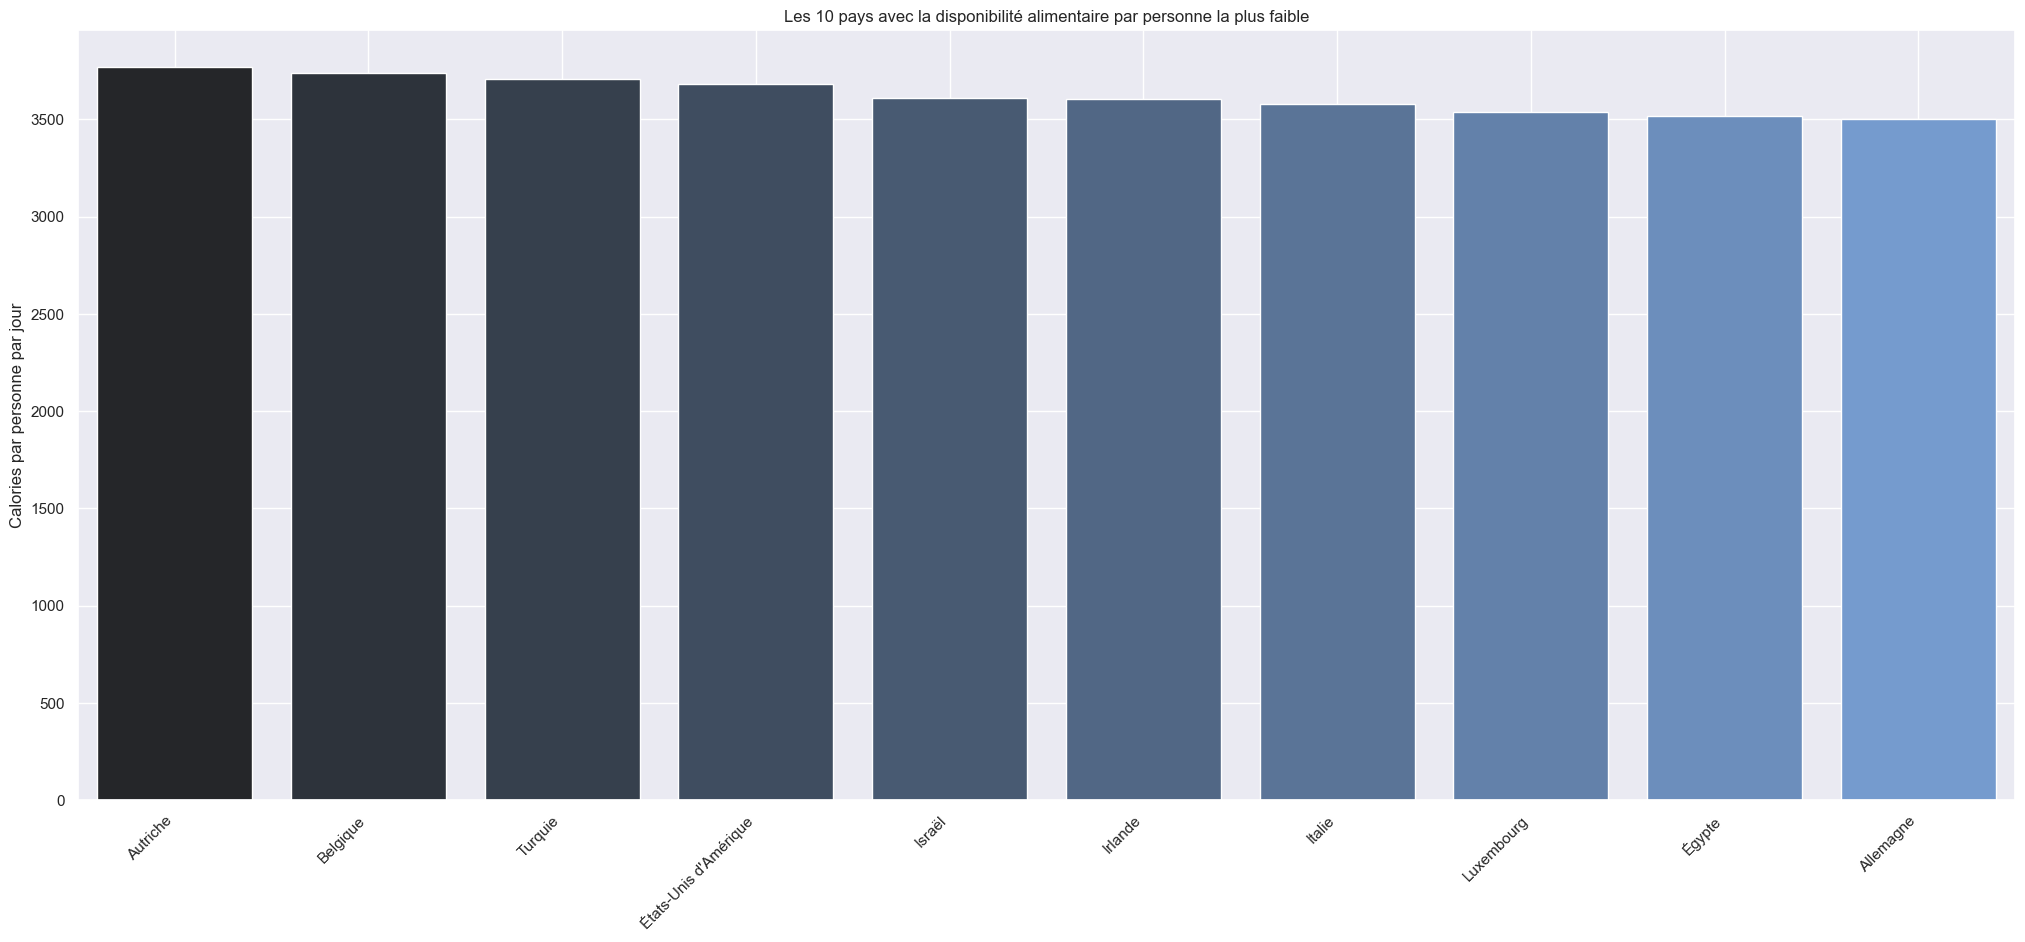

In [79]:
plt.figure(figsize=(25, 10))
palette = sns.dark_palette("#69d",  10)

sns.barplot(data=dispo_alimentaire_max, x='Zone', y='Disponibilité alimentaire (Kcal/personne/jour)', errorbar=None, palette = palette)
sns.color_palette("light:b", as_cmap=True)
                            
plt.xlabel("")
plt.ylabel("Calories par personne par jour")
plt.title("Les 10 pays avec la disponibilité alimentaire par personne la plus élévé")


plt.gca().set_axisbelow(True)
plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.show()

### 11) Exemple de la Thaïlande pour le Manioc

Création d'un dataframe focalisié sur la disponibilité ailmentaire lier au manioc en Thaïlande

In [80]:
dispo_manioc = dispo_alimentaire.loc[(dispo_alimentaire['Zone'] == 'Thaïlande') & (dispo_alimentaire['Produit'] == 'Manioc')]
dispo_manioc = dispo_manioc.reset_index()
dispo_manioc 

,index,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,13809,Thaïlande,Manioc,vegetale,1800000,2081000,40,13,0,0,6264000,25214000,1250000,871000,1511000,30228000,0,0,0


Calcul du poucentage de manioc exporté par rapport à la production

In [81]:
Poucentage_exp_manioc = (100 *dispo_manioc["Exportations - Quantité"])/ dispo_manioc["Production"]
print("L'exportation du Manioc représente", Poucentage_exp_manioc.to_string(index=False), "% de la production du pays")

L'exportation du Manioc représente 83 % de la production du pays


Calcul du poucentage de manioc importé par rapport à la production

In [82]:
Poucentage_imp_manioc = (100 *dispo_manioc["Importations - Quantité"])/ dispo_manioc["Production"]
print("L'importation du Manioc représente", Poucentage_imp_manioc.to_string(index=False), "% de la production du pays")

L'importation du Manioc représente 4 % de la production du pays


Calcul du poucentage des différentes valeurs composant la disponibilité intérieur

In [83]:
Pourcentage_aliments_animaux = (dispo_manioc['Aliments pour animaux'] / dispo_manioc['Disponibilité intérieure']) * 100
Poucentage_nouriture = (dispo_manioc['Nourriture'] / dispo_manioc['Disponibilité intérieure']) * 100
Poucentage_pertes = (dispo_manioc['Pertes'] / dispo_manioc['Disponibilité intérieure']) * 100
Poucentage_semences = (dispo_manioc['Semences'] / dispo_manioc['Disponibilité intérieure']) * 100
Poucentage_traitement = (dispo_manioc['Traitement'] / dispo_manioc['Disponibilité intérieure']) * 100
Poucentage_autre_utilisation = (dispo_manioc['Autres Utilisations'] / dispo_manioc['Disponibilité intérieure']) * 100

Création d'un diagramme circulaires représentant la répartition de la disponibilité intérieure totale du manioc en Thaïlande. 

Les 3 premières lignes correspondents au design du graphique.

Ensuite, je définie les paramètre de mon graphique.

Enfin je trace mon graphique avec les paramètres définies précédements et j'ajoute mon titre.

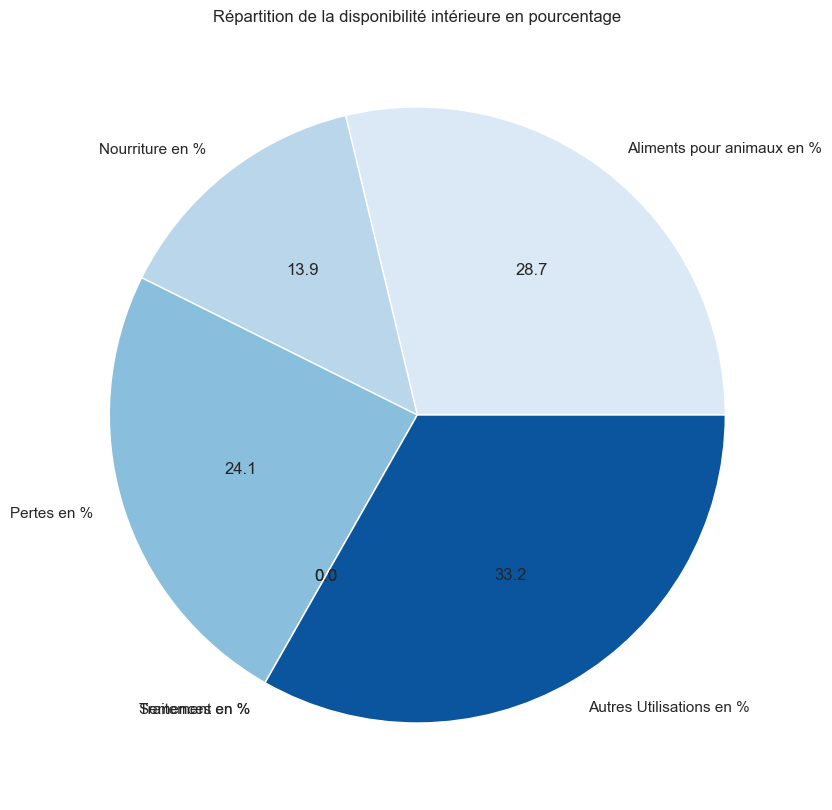

In [84]:
plt.figure(figsize=(10, 10))
sns.set_theme()
palette = sns.color_palette("Blues", 6)

values = np.concatenate([Pourcentage_aliments_animaux, Poucentage_nouriture, Poucentage_pertes, Poucentage_semences, Poucentage_traitement, Poucentage_autre_utilisation])
labels = ['Aliments pour animaux en %', 'Nourriture en %', 'Pertes en %', 'Semences en %', 'Traitement en %', 'Autres Utilisations en %']

plt.pie(values, labels=labels, autopct='%1.1f', colors = palette)
plt.title('Répartition de la disponibilité intérieure en pourcentage')

plt.show()

Création d'un dataframe focalisié sur la disponibilité ailmentaire en Thaïlande

In [85]:
dispo_alimentaire_thailande = dispo_alimentaire[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]
dispo_alimentaire_thailande = dispo_alimentaire_thailande.loc[dispo_alimentaire['Zone'] == 'Thaïlande'].groupby('Zone').sum(numeric_only = True)
dispo_alimentaire_thailande

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Thaïlande,2785


Création d'un dataframe sur la population moyen en Thaïlande

In [86]:
population_thailande = population.loc[population['Zone'] == 'Thaïlande'].groupby('Zone').mean(numeric_only = True)
population_thailande = population_thailande.drop(columns = ['Année']).reset_index()
population_thailande

,Zone,Population
0,Thaïlande,68817891


Création d'un dataframe sur la population moyen en état de sous nutrition en Thaïlande

In [87]:
sous_nutrition_thailande = sous_nutrition.loc[sous_nutrition['Zone'] == 'Thaïlande'].groupby('Zone').mean(numeric_only = True)
sous_nutrition_thailande 

,sous_nutrition
Zone,
Thaïlande,6133333


Création d'un dataframe sur les besoins alimentaire en Thaïlande

In [88]:
besoins_alimentaires_thailande = besoins_alimentaires.loc[besoins_alimentaires['Zone'] == 'Thaïlande']
besoins_alimentaires_thailande

Produit,Zone,Besoins énergétiques alimentaires minimaux (kcal/personne/jour),Besoins énergétiques alimentaires moyens (kcal/personne/jour)
171,Thaïlande,1885,2446


Jointure des différents dataframes cités plus haut et ajout des colonnes : de la proportion des personnes en état de sous nutrition, de la disponibilité calorique, et du nombre de personne nourrie avec les besoins énergétique moyen et minimum de la population thaïlandaise.

In [89]:
Thailande = pd.merge(population_thailande, sous_nutrition_thailande, on = 'Zone')
Thailande = pd.merge(Thailande, dispo_alimentaire_thailande, on = 'Zone')
Thailande = pd.merge(Thailande, besoins_alimentaires_thailande, on = 'Zone')
Thailande["% de personne en sous nutition"] = 100 * Thailande['sous_nutrition'] / Thailande['Population']
Thailande['dispo_kcal'] = (Thailande['Population'] * Thailande['Disponibilité alimentaire (Kcal/personne/jour)'])
Thailande['Humain nourrie min'] = round(Thailande['dispo_kcal'] / Thailande['Besoins énergétiques alimentaires minimaux (kcal/personne/jour)'], 0)
Thailande['Humain nourrie'] = round(Thailande['dispo_kcal'] / Thailande['Besoins énergétiques alimentaires moyens (kcal/personne/jour)'], 0)
Thailande 

,Zone,Population,sous_nutrition,Disponibilité alimentaire (Kcal/personne/jour),Besoins énergétiques alimentaires minimaux (kcal/personne/jour),Besoins énergétiques alimentaires moyens (kcal/personne/jour),% de personne en sous nutition,dispo_kcal,Humain nourrie min,Humain nourrie
0,Thaïlande,68817891,6133333,2785,1885,2446,9,191657826435,101675239,78355612


Affichage du poucentage de la population thaïlandaise qui pourrait être nourrie avec les besoins énergétiques moyen et minimaux

In [96]:
print("Avec les besoins énergétiques alimentaires moyens,", round(100 * (Thailande ['Humain nourrie'].sum() / Thailande ['Population'].sum()), 2), "% de la population Thaïlandaise pourrait être nourrie")

Avec les besoins énergétiques alimentaires moyens, 113.86 % de la population Thaïlandaise pourrait être nourrie


In [97]:
print("Avec les besoins énergétiques alimentaires minimum,", round(100 * (Thailande ['Humain nourrie min'].sum()/ Thailande ['Population'].sum()), 2), "% de la population Thaïlandaise pourrait être nourrie")

Avec les besoins énergétiques alimentaires minimum, 147.75 % de la population Thaïlandaise pourrait être nourrie
